# 데이터 선정

[NOAA Mauna Loa CO2 record](https://gml.noaa.gov/ccgg/trends) : 미국 Hawaii Mauna Loa에서 주기적으로 측정한 이산화탄소(CO2) 데이터
> - co2_mm_mlo.csv : monthly mean data
> - co2_annmean_mlo.csv : annual mean data
> - co2_gr_mlo.csv : annual mean **growth rates**
> - co2_weekly_mlo.csv : weekly mean and **historical comparisons**

이산화탄소 데이터랑 지구 온도 데이터를 scaling해서 겹쳐서 그래프를 그리면 어떻까?

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

1 monthly mean data

In [3]:
# 이산화탄소 데이터 불러오기
base_path = './data/'
mm = pd.read_csv(base_path + 'co2_mm_mlo.csv')

In [21]:
mm.head()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.70,314.43,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.71,-1,-9.99,-0.99
3,1958,6,1958.4548,317.24,315.14,-1,-9.99,-0.99
4,1958,7,1958.5370,315.86,315.18,-1,-9.99,-0.99


In [22]:
mm.tail()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
766,2022,1,2022.0417,418.19,417.82,29,0.73,0.26
767,2022,2,2022.1250,419.28,418.32,27,0.92,0.34
768,2022,3,2022.2083,418.81,417.34,30,0.78,0.27
769,2022,4,2022.2917,420.23,417.55,28,0.85,0.31
770,2022,5,2022.3750,420.99,417.57,30,0.76,0.27


In [23]:
mm.info() # 확인결과 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 771 entries, 0 to 770
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            771 non-null    int64  
 1   month           771 non-null    int64  
 2   decimal date    771 non-null    float64
 3   average         771 non-null    float64
 4   deseasonalized  771 non-null    float64
 5   ndays           771 non-null    int64  
 6   sdev            771 non-null    float64
 7   unc             771 non-null    float64
dtypes: float64(5), int64(3)
memory usage: 48.3 KB


In [24]:
mm.describe()

,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
count,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000,771.000000
mean,1989.792477,6.490272,1990.291030,357.195590,357.183722,18.852140,-2.166757,-0.109001
std,18.562313,3.451459,18.560233,30.205259,30.130620,12.095676,4.573579,0.519067
min,1958.000000,1.000000,1958.202700,312.430000,314.430000,-1.000000,-9.990000,-0.990000
25%,1974.000000,3.500000,1974.245200,329.570000,330.215000,-1.000000,-9.990000,-0.990000
50%,1990.000000,6.000000,1990.291700,353.890000,354.230000,25.000000,0.390000,0.150000
75%,2006.000000,9.000000,2006.333350,381.800000,381.995000,28.000000,0.560000,0.210000
max,2022.000000,12.000000,2022.375000,420.990000,418.320000,31.000000,1.310000,0.580000


In [25]:
# 'year'와 'month'를 합쳐서 'date'라는 datamtime 형식으로 만듬
'''다른 방식 : 
def to_datetime(row) :
    return dt.date(int(row.year), int(row.month), 1).strftime('%Y-%m')
mm['date'] = mm.apply(to_datetime, axis =1)'''

mm['date'] = pd.to_datetime(mm[['year','month']].assign(day=1))

<AxesSubplot:xlabel='date', ylabel='average'>

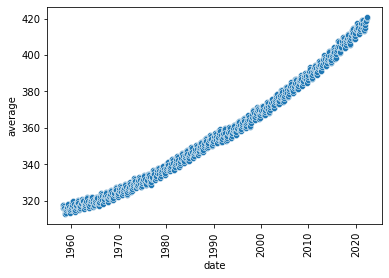

In [26]:
# 계절성 포함
plt.xticks(rotation='90')
sns.scatterplot(x='date', y='average', data=mm)

<AxesSubplot:xlabel='date', ylabel='deseasonalized'>

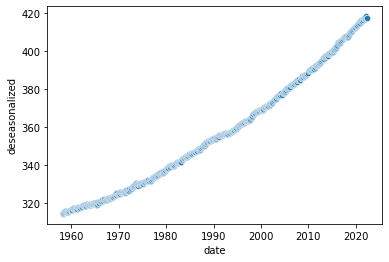

In [27]:
# 계절성 제거
sns.scatterplot(x='date', y='deseasonalized', data=mm)

2 weekly mean and **historical comparisons**

In [28]:
hist = pd.read_csv(base_path + '/co2_weekly_mlo.csv')

In [29]:
hist.head()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06


In [30]:
hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 2506 non-null   int64  
 1   month                2506 non-null   int64  
 2   day                  2506 non-null   int64  
 3   decimal              2506 non-null   float64
 4   average              2506 non-null   float64
 5   ndays                2506 non-null   int64  
 6   1 year ago           2506 non-null   float64
 7   10 years ago         2506 non-null   float64
 8   increase since 1800  2506 non-null   float64
dtypes: float64(5), int64(4)
memory usage: 176.3 KB


In [31]:
# 'year', 'month', 'day'를 합쳐서 'date'라는 datamtime 형식으로 만듬
hist['date'] = pd.to_datetime(hist[['year','month','day']])

In [32]:
hist.head()

,year,month,day,decimal,average,ndays,1 year ago,10 years ago,increase since 1800,date
0,1974,5,19,1974.3795,333.37,5,-999.99,-999.99,50.40,1974-05-19
1,1974,5,26,1974.3986,332.95,6,-999.99,-999.99,50.06,1974-05-26
2,1974,6,2,1974.4178,332.35,5,-999.99,-999.99,49.60,1974-06-02
3,1974,6,9,1974.4370,332.20,7,-999.99,-999.99,49.65,1974-06-09
4,1974,6,16,1974.4562,332.37,7,-999.99,-999.99,50.06,1974-06-16


<AxesSubplot:xlabel='date', ylabel='increase since 1800'>

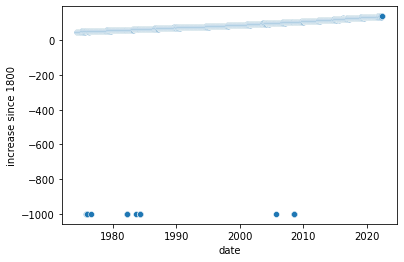

In [33]:
sns.scatterplot(x='date', y='increase since 1800',data=hist)

3 annual mean **growth rates**

In [34]:
gr = pd.read_csv(base_path + 'co2_gr_mlo.csv')

In [35]:
gr.head()

,year,ann inc,unc
0,1959,0.94,0.11
1,1960,0.50,0.11
2,1961,0.96,0.11
3,1962,0.64,0.11
4,1963,0.71,0.11


<AxesSubplot:xlabel='year', ylabel='ann inc'>

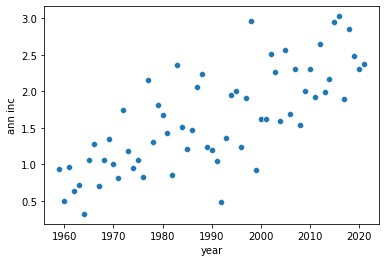

In [36]:
sns.scatterplot(x='year', y='ann inc', data=gr)

4 annual mean data

In [37]:
ann = pd.read_csv(base_path + 'co2_annmean_mlo.csv')

In [38]:
ann.head()

,year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


<AxesSubplot:xlabel='year', ylabel='mean'>

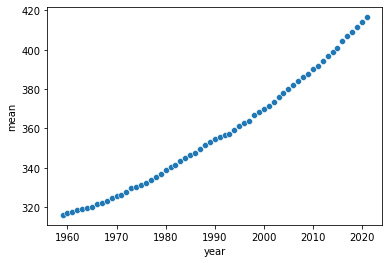

In [39]:
sns.scatterplot(x='year', y='mean',data=ann)

# Fig 1 (출처 : https://gml.noaa.gov/ccgg/)

In [34]:
ch4_ann = pd.read_csv(base_path + 'ch4_ann.csv')
n2o_ann = pd.read_csv(base_path + 'n2o_ann.csv')

In [43]:
ch4_ann['gas'] = 'CH4'
n2o_ann['gas'] = 'N2O'
two_ann = pd.concat([ch4_ann, n2o_ann], ignore_index=True)

In [45]:
fig = px.line(two_ann, x='year', y='mean', color='gas', markers=True)
fig.show()